In [2]:
from os.path import split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import pipeline
from transformers import BertTokenizer, AutoModel

/home/radit/anaconda3/envs/sentiment-analysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/raw/dataset_Google-Maps-Reviews-Scraper_2025-11-17_06-40-05-994.csv")

In [4]:
df.head(5)

,title,url,stars,name,reviewUrl,text
0,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,alfina noorbafa,https://www.google.com/maps/reviews/data=!4m8!...,NaN
1,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,1,Bagus atmojo,https://www.google.com/maps/reviews/data=!4m8!...,Pengamen bisa sembarangan masuk di jalan setel...
2,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Vanessa Linares Sanchez,https://www.google.com/maps/reviews/data=!4m8!...,Sehr zu empfehlen
3,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Jevy Ermado,https://www.google.com/maps/reviews/data=!4m8!...,NaN
4,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Raditya Pranandha Zld,https://www.google.com/maps/reviews/data=!4m8!...,NaN


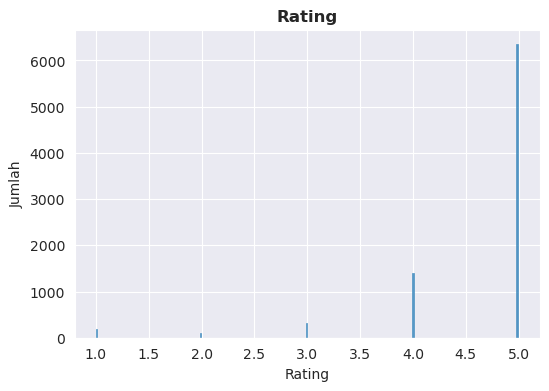

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['stars'])
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Rating', fontweight='bold')
plt.show()

In [6]:
print(df.info())
print('========================')
print(df.describe())
print('========================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8333 entries, 0 to 8332
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      8333 non-null   object
 1   url        8333 non-null   object
 2   stars      8333 non-null   int64 
 3   name       8333 non-null   object
 4   reviewUrl  8333 non-null   object
 5   text       3829 non-null   object
dtypes: int64(1), object(5)
memory usage: 390.7+ KB
None
             stars
count  8333.000000
mean      4.635785
std       0.797982
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


In [7]:
print("Jumlah data kosong: ")
print(df.isnull().sum())
print('================================')
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data kosong: 
title           0
url             0
stars           0
name            0
reviewUrl       0
text         4504
dtype: int64
Jumlah data duplikat:  0


In [8]:
df = df.dropna()

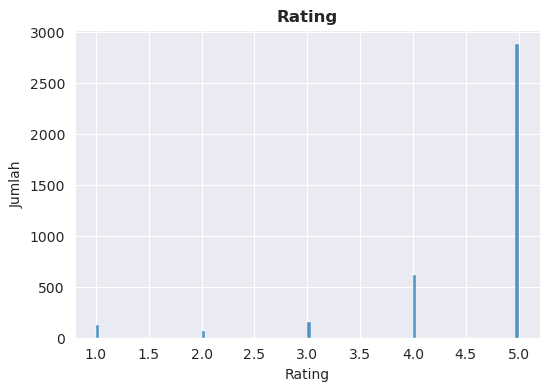

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['stars'])
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Rating', fontweight='bold')
plt.show()

In [11]:
df

,title,url,stars,name,reviewUrl,text
1,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,1,Bagus atmojo,https://www.google.com/maps/reviews/data=!4m8!...,Pengamen bisa sembarangan masuk di jalan setel...
2,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Vanessa Linares Sanchez,https://www.google.com/maps/reviews/data=!4m8!...,Sehr zu empfehlen
5,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Afifa Koesnandar,https://www.google.com/maps/reviews/data=!4m8!...,sebenernya banyak wahana tapi karena kecapekan...
8,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Dita Kurnia,https://www.google.com/maps/reviews/data=!4m8!...,Tempat ini sangat seru cocok untuk bersama tem...
10,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Arga dearga,https://www.google.com/maps/reviews/data=!4m8!...,"skal tanggal 13 Oktober 2025, seru poll"
...,...,...,...,...,...,...
8322,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,BANG RADEN,https://www.google.com/maps/reviews/data=!4m8!...,cukup oke lah kaloau seru2an dengan wahana ext...
8324,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,stefani recha,https://www.google.com/maps/reviews/data=!4m8!...,"Nggak pernah kecewa main disini, tiap tahunnya..."
8326,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,yoga parianom,https://www.google.com/maps/reviews/data=!4m8!...,Banyak mainanya
8329,Jawa Timur Park 1,https://www.google.com/maps/search/?api=1&quer...,5,Nathasya Josephine李美芳,https://www.google.com/maps/reviews/data=!4m8!...,A good recreation place for you and your frien...
